In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://www.imdb.com/chart/top/"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

movies = soup.find_all('li', class_='ipc-metadata-list-summary-item')


In [ ]:
movie_data = {
    'Title': [],
    'Year': [],
    'Rating': [],
    'Rank': []
}

In [ ]:
for idx, movie in enumerate(movies[:50], 1):
    title_elem = movie.find('h3', class_='ipc-title__text')
    if title_elem:
        title_parts = title_elem.text.split('. ', 1)
        title = title_parts[1] if len(title_parts) > 1 else title_parts[0]
    else:
        title = 'N/A'
    movie_data['Title'].append(title)

    metadata = movie.find_all('span', class_='sc-b189961a-8')
    year = metadata[0].text if len(metadata) > 0 else 'N/A'
    movie_data['Year'].append(year)

    rating_elem = movie.find('span', class_='ipc-rating-star--rating')
    rating = rating_elem.text if rating_elem else 'N/A'
    movie_data['Rating'].append(rating)

    movie_data['Rank'].append(idx)

In [ ]:
df = pd.DataFrame(movie_data)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.to_csv('scraped_movies.csv', index=False)
print(df)

                                                Title  Year  Rating  Rank
0                            The Shawshank Redemption   NaN     9.3     1
1                                       The Godfather   NaN     9.2     2
2                                     The Dark Knight   NaN     9.1     3
3                               The Godfather Part II   NaN     9.0     4
4                                        12 Angry Men   NaN     9.0     5
5       The Lord of the Rings: The Return of the King   NaN     9.0     6
6                                    Schindler's List   NaN     9.0     7
7   The Lord of the Rings: The Fellowship of the Ring   NaN     8.9     8
8                                        Pulp Fiction   NaN     8.8     9
9                      The Good, the Bad and the Ugly   NaN     8.8    10
10              The Lord of the Rings: The Two Towers   NaN     8.8    11
11                                       Forrest Gump   NaN     8.8    12
12                                    

In [ ]:
print("="*70)
print("EXPLORATORY DATA ANALYSIS (EDA) - IMDB TOP 50 MOVIES")
print("="*70)

EXPLORATORY DATA ANALYSIS (EDA) - IMDB TOP 50 MOVIES


In [ ]:
print("-"*70)
print("1. What is the average rating of top movies?")
print("2. Which decade has the most top-rated movies?")
print("3. Are there any rating outliers?")
print("4. What is the relationship between year and rating?")
print("5. Are there missing values in the dataset?")

----------------------------------------------------------------------
1. What is the average rating of top movies?
2. Which decade has the most top-rated movies?
3. Are there any rating outliers?
4. What is the relationship between year and rating?
5. Are there missing values in the dataset?


In [ ]:
print("\n\n>>> 1. DATA STRUCTURE EXPLORATION")
print("-"*70)
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names: {df.columns.tolist()}")
print(f"\nData Types:")
print(df.dtypes)
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")



>>> 1. DATA STRUCTURE EXPLORATION
----------------------------------------------------------------------
Dataset Shape: 25 rows × 4 columns

Column Names: ['Title', 'Year', 'Rating', 'Rank']

Data Types:
Title      object
Year      float64
Rating    float64
Rank        int64
dtype: object

Memory Usage: 2.41 KB


In [ ]:
print("\n\n>>> 2. FIRST & LAST ROWS")
print("-"*70)
print("First 5 Movies:")
print(df.head())
print("\nLast 5 Movies:")
print(df.tail())



>>> 2. FIRST & LAST ROWS
----------------------------------------------------------------------
First 5 Movies:
                      Title  Year  Rating  Rank
0  The Shawshank Redemption   NaN     9.3     1
1             The Godfather   NaN     9.2     2
2           The Dark Knight   NaN     9.1     3
3     The Godfather Part II   NaN     9.0     4
4              12 Angry Men   NaN     9.0     5

Last 5 Movies:
                       Title  Year  Rating  Rank
20     It's a Wonderful Life   NaN     8.6    21
21  The Silence of the Lambs   NaN     8.6    22
22             Seven Samurai   NaN     8.6    23
23       Saving Private Ryan   NaN     8.6    24
24            The Green Mile   NaN     8.6    25


In [ ]:
print("\n\n>>> 3. STATISTICAL SUMMARY")
print("-"*70)
print(df.describe())
print(f"\nAdditional Statistics:")
print(f"Rating Range: {df['Rating'].min():.1f} - {df['Rating'].max():.1f}")
print(f"Rating Variance: {df['Rating'].var():.4f}")
if not df['Year'].isnull().all():
    print(f"Year Range: {int(df['Year'].min())} - {int(df['Year'].max())}")
else:
    print("Year Range: No valid year data available.")



>>> 3. STATISTICAL SUMMARY
----------------------------------------------------------------------
       Year     Rating       Rank
count   0.0  25.000000  25.000000
mean    NaN   8.816000  13.000000
std     NaN   0.199332   7.359801
min     NaN   8.600000   1.000000
25%     NaN   8.700000   7.000000
50%     NaN   8.800000  13.000000
75%     NaN   9.000000  19.000000
max     NaN   9.300000  25.000000

Additional Statistics:
Rating Range: 8.6 - 9.3
Rating Variance: 0.0397
Year Range: No valid year data available.


In [ ]:
print("\n\n>>> 4. MISSING VALUES ANALYSIS")
print("-"*70)
missing = df.isnull().sum()
print("Missing values per column:")
print(missing)
print(f"\nTotal Missing Values: {missing.sum()}")
print(f"Percentage Missing: {(missing.sum() / df.size * 100):.2f}%")



>>> 4. MISSING VALUES ANALYSIS
----------------------------------------------------------------------
Missing values per column:
Title      0
Year      25
Rating     0
Rank       0
dtype: int64

Total Missing Values: 25
Percentage Missing: 25.00%


In [ ]:
print("\n\n>>> 5. DATA QUALITY CHECK")
print("-"*70)
print(f"Duplicate Rows: {df.duplicated().sum()}")
print(f"Unique Titles: {df['Title'].nunique()}")
print(f"Unique Years: {df['Year'].nunique()}")
print(f"Unique Ratings: {df['Rating'].nunique()}")



>>> 5. DATA QUALITY CHECK
----------------------------------------------------------------------
Duplicate Rows: 0
Unique Titles: 25
Unique Years: 0
Unique Ratings: 8


In [ ]:
print("\nRating Distribution:")
rating_bins = pd.cut(df['Rating'], bins=[8.0, 8.5, 9.0, 9.5], include_lowest=True)
print(rating_bins.value_counts().sort_index())



Rating Distribution:
Rating
(7.999, 8.5]     0
(8.5, 9.0]      22
(9.0, 9.5]       3
Name: count, dtype: int64


In [ ]:
print("\nHypothesis : Ratings are normally distributed")
print(f"Skewness: {df['Rating'].skew():.4f}")
print(f"Kurtosis: {df['Rating'].kurtosis():.4f}")



Hypothesis : Ratings are normally distributed
Skewness: 0.8585
Kurtosis: 0.0338


In [ ]:
print("\n\n>>> 8. ANOMALY DETECTION")
print("-"*70)
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]
print(f"Outliers Found: {len(outliers)}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
if len(outliers) > 0:
    print("\nOutlier Movies:")
    print(outliers[['Rank', 'Title', 'Rating', 'Year']])




>>> 8. ANOMALY DETECTION
----------------------------------------------------------------------
Outliers Found: 0
Lower Bound: 8.25, Upper Bound: 9.45


In [ ]:
print("\n\n>>> 9. CORRELATION ANALYSIS")
print("-"*70)
correlation = df[['Rank', 'Year', 'Rating']].corr()
print(correlation)



>>> 9. CORRELATION ANALYSIS
----------------------------------------------------------------------
            Rank  Year    Rating
Rank    1.000000   NaN -0.945778
Year         NaN   NaN       NaN
Rating -0.945778   NaN  1.000000




>>> 10. VISUALIZATIONS
----------------------------------------------------------------------


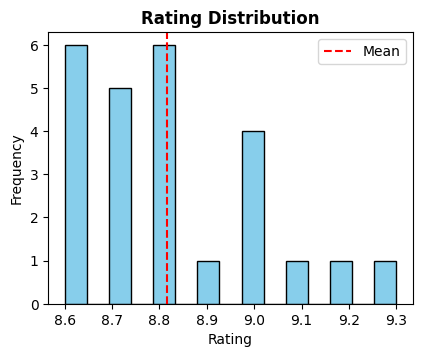

In [ ]:
print("\n\n>>> 10. VISUALIZATIONS")
print("-"*70)
fig = plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 1)
plt.hist(df['Rating'], bins=15, color='skyblue', edgecolor='black')
plt.title('Rating Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(df['Rating'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()


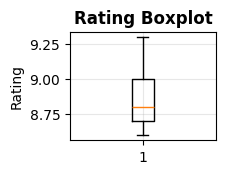

In [ ]:
plt.subplot(3, 3, 3)
plt.boxplot(df['Rating'], vert=True)
plt.title('Rating Boxplot', fontsize=12, fontweight='bold')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)

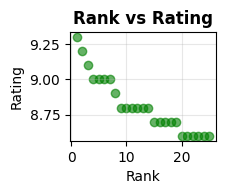

In [ ]:
plt.subplot(3, 3, 5)
plt.scatter(df['Rank'], df['Rating'], alpha=0.6, color='green')
plt.title('Rank vs Rating', fontsize=12, fontweight='bold')
plt.xlabel('Rank')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)


Text(0.5, 1.0, 'Correlation Heatmap')

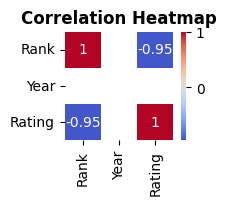

In [ ]:
plt.subplot(3, 3, 7)
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap', fontsize=12, fontweight='bold')


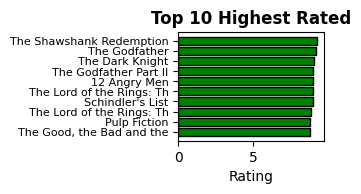

In [ ]:
plt.subplot(3, 3, 8)
top10 = df.nlargest(10, 'Rating')[['Title', 'Rating']]
plt.barh(range(len(top10)), top10['Rating'], color='green', edgecolor='black')
plt.yticks(range(len(top10)), [t[:25] for t in top10['Title']], fontsize=8)
plt.title('Top 10 Highest Rated', fontsize=12, fontweight='bold')
plt.xlabel('Rating')
plt.gca().invert_yaxis()